In [67]:
#  %pip install numpy matplotlib pandas seaborn

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Exploring the Experiment's Design

In this set of exercises, we'll get our first look at the experiment we'll be analyzing in this course; curated data from the [Steinmetz et al, 2019](https://www.nature.com/articles/s41586-019-1787-x) paper.  

Today's data is focused on three CSV files, each containing sessions from a different stretch of data collection.  They contain trial-level data from the experiment: 
  - `steinmetz_winter2016.csv`
  - `steinmetz_summer2017.csv`
  - `steinmetz_winter2017.csv`

These exercises are meant to get practice in working with **Pandas Dataframes**, a tool that appears in a lot of Python data science analyses!


#### Load Data and Get a Quick Description

```python
pd.read_csv()
df.head(5), df[:5]
df.tail(5), df[-5:]
len(df)
```

##### Exercises

Let's get a sense of what kind of data is in these files.  Load each of the datasets into a different variable name using the `pd.read_csv()` function, and answer the questions below!


**Example**: Load the Winter 2016 dataset and preview the first 3 rows of the data

In [5]:
df1 = pd.read_csv('./steinmetz_winter2016.csv')
df1[:3]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e


Load the Winter 2017 Dataset and preview the first 5 rows of the data

In [6]:
df2 = pd.read_csv('./steinmetz_winter2017.csv')
df2[:5]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,0.508117,1.0,0.903312,0.946524,1.0,210.0,1.0,Theiler,2017-10-11,aeb92f
1,2,True,0,100,0.5,0.678304,1.0,0.859908,0.859908,-1.0,270.0,1.0,Theiler,2017-10-11,aeb92f
2,3,True,0,100,0.5,0.508295,-1.0,0.646241,0.683098,1.0,320.0,-1.0,Theiler,2017-10-11,aeb92f
3,4,True,0,25,0.5,0.437219,-1.0,0.985264,1.022429,1.0,790.0,-1.0,Theiler,2017-10-11,aeb92f
4,5,True,100,25,0.5,0.672789,1.0,1.137715,1.175197,1.0,250.0,1.0,Theiler,2017-10-11,aeb92f


Load the Summer 2017 Dataset and preview the last 4 rows of the data

In [7]:
df3 = pd.read_csv('./steinmetz_summer2017.csv')
df3[-4:]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
2743,449,False,100,25,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2744,450,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2745,451,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2746,452,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9


Calculate the number of rows (i.e. the "length") of each of the three datasets. In this data, each row represents one trial.  Which file contained the most trials?

**Example**: N Trials, Winter 2016:

In [8]:
len(df1)

3767

N Trials, Winter 2017:

In [9]:
len(df2)

7906

N Trials, Summer 2017:

In [10]:
len(df3)

2747

### Exploring the Structure of a Dataset for the Purpose of Merging Them

Multi-session data is easiest to analyze with when each session is organized the same way, and contains the same variables.  In a table (what the `pandas` library calls a `DataFrame`), that means all the datasets have the same columns and that they store the same kind of data. 

Useful code:
  - **df.columns**
  - **df.dtypes**
  - **df.info()** 

**Exercises** 

Let's look in more detail at each of these tables' structures!

**Example**: What columns are in the Winter 2016 data?

In [12]:
df1.columns

Index(['trial', 'active_trials', 'contrast_left', 'contrast_right',
       'stim_onset', 'gocue_time', 'response_type', 'response_time',
       'feedback_time', 'feedback_type', 'reaction_time', 'reaction_type',
       'mouse', 'session_date', 'session_id'],
      dtype='object')

What columns are in the Winter 2017 data, and under data type (i.e. "dtype") is each column's data formatted as? 

In [13]:
df2.dtypes

trial               int64
active_trials        bool
contrast_left       int64
contrast_right      int64
stim_onset        float64
gocue_time        float64
response_type     float64
response_time     float64
feedback_time     float64
feedback_type     float64
reaction_time     float64
reaction_type     float64
mouse              object
session_date       object
session_id         object
dtype: object

For the Summer 2017 data, let's get more `info`; in this case, the number of rows with non-missing data for each column, as well as much memory the dataset takes up on the computer.

Is there any missing data in the Summer 2017 dataset?  And how many kilobytes does it take up?

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trial           2747 non-null   int64  
 1   active_trials   2747 non-null   bool   
 2   contrast_left   2747 non-null   int64  
 3   contrast_right  2747 non-null   int64  
 4   stim_onset      2747 non-null   float64
 5   gocue_time      2017 non-null   float64
 6   response_type   2017 non-null   float64
 7   response_time   2017 non-null   float64
 8   feedback_time   2017 non-null   float64
 9   feedback_type   2017 non-null   float64
 10  reaction_time   2017 non-null   float64
 11  reaction_type   2017 non-null   float64
 12  mouse           2747 non-null   object 
 13  session_date    2747 non-null   object 
 14  session_id      2747 non-null   object 
dtypes: bool(1), float64(8), int64(3), object(3)
memory usage: 303.3+ KB


#### Merging the Datasets

Having three different variables that contain similar data makes it harder for us to analyze our data.  Let's concatenate the data into a single table to use for the rest of this analysis.  The following line of code is helpful here:

```python
df = pd.concat(             # The concat() function, from the Pandas package.
    [dataset1, dataset2],   # A list of variables referencing DataFrmaes
    ignore_index=True,      # Recalculate the row number labels.
)
```

**Exercise**: Concatenate the three tables into a single one.

In [20]:
df = pd.concat([df1, df2, df3]);

How many trials are in the entire dataset?

In [21]:
len(df)

14420

Are the same columns still in this dataset?

In [22]:
df.columns

Index(['trial', 'active_trials', 'contrast_left', 'contrast_right',
       'stim_onset', 'gocue_time', 'response_type', 'response_time',
       'feedback_time', 'feedback_type', 'reaction_time', 'reaction_type',
       'mouse', 'session_date', 'session_id'],
      dtype='object')

How much memory does the entire dataset take up, in Megabytes (Note: 1 gigabyte is roughly 1000 megabytes, which is roughly 1000 kilobytes) ? 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14420 entries, 0 to 2746
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trial           14420 non-null  int64  
 1   active_trials   14420 non-null  bool   
 2   contrast_left   14420 non-null  int64  
 3   contrast_right  14420 non-null  int64  
 4   stim_onset      14420 non-null  float64
 5   gocue_time      10050 non-null  float64
 6   response_type   10050 non-null  float64
 7   response_time   10050 non-null  float64
 8   feedback_time   10050 non-null  float64
 9   feedback_type   10050 non-null  float64
 10  reaction_time   10050 non-null  float64
 11  reaction_type   10050 non-null  float64
 12  mouse           14420 non-null  object 
 13  session_date    14420 non-null  object 
 14  session_id      14420 non-null  object 
dtypes: bool(1), float64(8), int64(3), object(3)
memory usage: 1.7+ MB


### Counting Categorical Data: Counting Sessions, Mice, and Trial Conditions

In Python, the square brackets can be used to get data from a data collection.  In the case of Pandas Dataframes (which our table is an instance of), this lets us get the columns by name.

```python
df['column'].nunique()
df['column'].unique()
df['column'].value_counts().sort_index()
df[['column1', 'column2']].value_counts().sort_index()  # note the double square brackets; these are needed when getting multiple columns at once.
```

Let's use these techniques to answer some questions about how the experiment was structured.

How many sessions are in the entire dataset (i.e. how many unique values are there in the column "session_id")?

In [24]:
df['session_id'].nunique()

39

How many mice?

In [25]:
df['mouse'].nunique()

10

What were the names of the mice?

In [26]:
df['mouse'].unique()

array(['Cori', 'Muller', 'Radnitz', 'Theiler', 'Richards', 'Forssmann',
       'Lederberg', 'Tatum', 'Moniz', 'Hench'], dtype=object)

What are the different contrast levels for the left stimulus?

In [27]:
df['contrast_left'].unique()

array([100,   0,  50,  25], dtype=int64)

How many different contrast levels are there for the left stimulus?

In [28]:
df['contrast_left'].nunique()

4

What were the different values in feedback_types?

In [29]:
df['feedback_type'].unique()

array([ 1., -1., nan])

What were the different values in response types?

In [31]:
df['response_type'].unique()

array([ 1., -1.,  0., nan])

How many trials were considered "active" (i.e. the mouse was expected to be actively responding to the stimuli, vs just being passively shown stimuli at the end of a session)?

In [32]:
df['active_trials'].value_counts()

active_trials
True     10050
False     4370
Name: count, dtype: int64

How many trials did each of the mice do?

In [35]:
df['mouse'].value_counts().sort_index()

mouse
Cori         1143
Forssmann    1485
Hench        1851
Lederberg    2902
Moniz         896
Muller       1112
Radnitz      1512
Richards     1677
Tatum        1389
Theiler       453
Name: count, dtype: int64

How many trials were there for each value of `contrast_left`?

In [36]:
df['contrast_left'].value_counts().sort_index()

contrast_left
0      7200
25     1680
50     1696
100    3844
Name: count, dtype: int64

Each trial contained two stimuli: one on the left of the mouse, and one on the right, each with their own contrast levels.  How many triasl were there for each combination of `contrast_left` and `contrast_right`?

In [37]:
df[['contrast_left', 'contrast_right']].value_counts().sort_index()

contrast_left  contrast_right
0              0                 2649
               25                 738
               50                1078
               100               2735
25             0                  353
               25                 255
               50                 372
               100                700
50             0                  767
               25                 348
               50                 256
               100                325
100            0                 1334
               25                1187
               50                 712
               100                611
Name: count, dtype: int64

### Calculating Statics on Continuous Data: Measuring Response Time

```python
df['column'].min()
df['column'].max()
df['column'].mean()
df['column'].median()
df['column'].std()
df[['column1', 'column2']].mean()   # it's possible to calculate on multiple columns at once
```

What was the minimum response time?

In [33]:
df['response_time'].min()

0.4794144976744405

What was the maximum response time across all the trials?

In [34]:
df['response_time'].max()

2.713576095788426

What was the mean response time?  

In [35]:
df['response_time'].mean()

1.4228323570687087

What was the median response time?

In [36]:
df['response_time'].median()


1.1833335596579744

**Extra**: It's possible to calculate multiple aggregation statistics at the same time, as well, using the `df.agg()` method and giving it a list of statistic functions to call on the data, for example from the numpy (`np`) package:

```python
df[['column1', 'column2']].agg([np.mean, np.min, np.max])
```

If you like, try out this pattern by calculating the min, max, mean, and median at the same time on the response times and the reaction times!

In [46]:
df[['response_time', 'reaction_time']].agg([np.mean, np.median, np.min, np.max])

,response_time,reaction_time
mean,1.422832,inf
median,1.183334,460.0
min,0.479414,0.0
max,2.713576,inf


## Experiment Description: Calculating Statistics of Across Categorical Data

Perhaps the most useful pattern in all of data science is the `group-by` pattern; it lets you compute a statistic on different groups of data, essentially building a mini analysis pipeline in a single line of code!  

Here is the pattern, broken down into its individual steps:


```python
(
df                     # 1. Choose a dataset
.groupby('column1')    # 2. Split the Data into sub-datasets, based on values in column1
['column2']            # 3. Get column2 in each of those sub-datasets
.mean()                # 4. Calculate the mean of column2 for each sub-dataset
)
```

 Below are some examples of the pattern:

```python
df.groupby('column1')['column2'].size()
df.groupby('column1')['column2'].size().sort_index()
df.groupby('column1')['column2'].size().mean()
df.groupby('column1')['column2'].median()
df.groupby('column1')['column2'].min()
df.groupby('column1')['column2'].max()
df.groupby(['column1', 'column2'])['column3'].mean()
df.groupby(['column1', 'column2'])['column3'].median()
df.groupby(['column1', 'column2'])['column3'].median().reset_index()
df.groupby('column1')['column2'].plot.bar()  # bar plot
df.groupby('column1')['column2'].plot.barh() # horizontal bar plot
df.groupby('column1')['column2'].size().plot.line()  # line plot
```


Let's try it out!

How many trials did each mouse perform?

In [14]:
df.groupby('mouse').size()

mouse
Cori          693
Forssmann    1045
Hench        1411
Lederberg    2132
Moniz         606
Muller        782
Radnitz       962
Richards     1127
Tatum         949
Theiler       343
dtype: int64

How many trials were there of each contrast_left level?

In [47]:
df.groupby('contrast_left').size()

contrast_left
0      7200
25     1680
50     1696
100    3844
dtype: int64

What was the mean response time for each mouse?

In [48]:
df.groupby('mouse')['response_time'].mean()

mouse
Cori         1.590866
Forssmann    1.470583
Hench        1.525732
Lederberg    1.143775
Moniz        1.777660
Muller       1.575818
Radnitz      1.559084
Richards     1.358330
Tatum        1.337701
Theiler      1.338751
Name: response_time, dtype: float64

What was the mean number of trials in each session?

In [16]:
df.groupby('session_id').size().mean()

257.6923076923077

What was the minimum number of trials in a session?

In [17]:
df.groupby('session_id').size().min()

124

How many sessions did each mouse do?

In [18]:
df.groupby('mouse')['session_id'].nunique()

mouse
Cori         3
Forssmann    4
Hench        4
Lederberg    7
Moniz        3
Muller       3
Radnitz      5
Richards     5
Tatum        4
Theiler      1
Name: session_id, dtype: int64

How many trials were their of each combination of contrast_left and contrast_right levels?

In [25]:
df.groupby(['contrast_left', 'contrast_right']).size()

contrast_left  contrast_right
0              0                 2649
               25                 348
               50                 688
               100                945
25             0                  323
               25                 225
               50                 342
               100                670
50             0                  737
               25                 318
               50                 226
               100                295
100            0                  944
               25                 797
               50                 322
               100                221
dtype: int64

Which session ids did each mouse do?

In [24]:
df.groupby('mouse')['session_id'].unique()

mouse
Cori                                  [5dd41e, 4f2dea, d67ad3]
Forssmann                     [1ff779, d5ef5b, 96a48e, b38573]
Hench                         [cdb38d, a8f871, 2bb71d, dd9ee9]
Lederberg    [b8aea4, 5f365d, b34dbd, 7875a5, 0bbaa1, 42bca...
Moniz                                 [e93982, b6481c, 74469d]
Muller                                [0bb71d, fd552a, 4a93b2]
Radnitz               [83c308, a69dfa, 19d103, 0206f3, 166d73]
Richards              [184ce1, 6788a7, 571617, 06d7a5, f4d600]
Tatum                         [47d60f, dc83da, 7c7123, aadac0]
Theiler                                               [aeb92f]
Name: session_id, dtype: object

Make a bar plot showing how many trials there were for each contrast_right level.

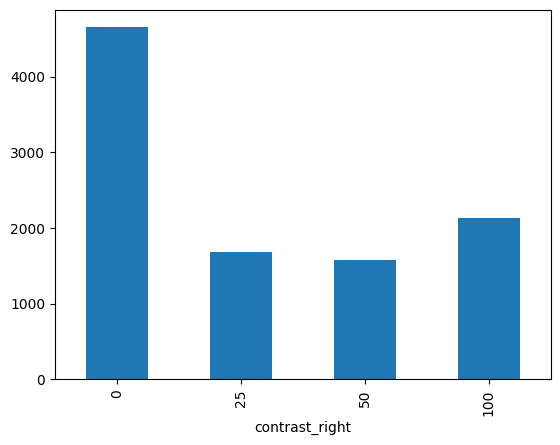

In [20]:
df.groupby('contrast_right').size().plot.bar();

Make a horizontal bar plot showing how many sessions each mouse did.

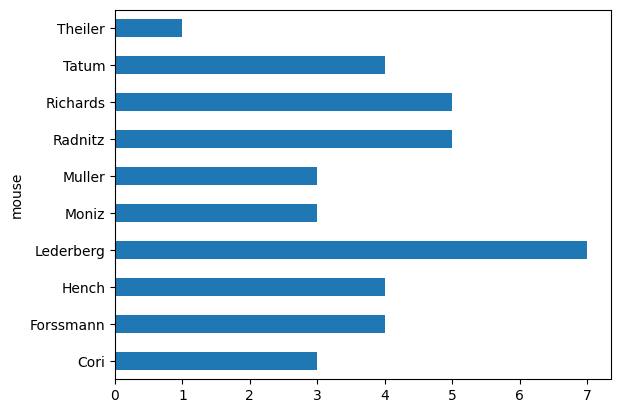

In [19]:
df.groupby('mouse')['session_id'].nunique().plot.barh();

Make a line plot showing how many trials there were for each contrast_left level.

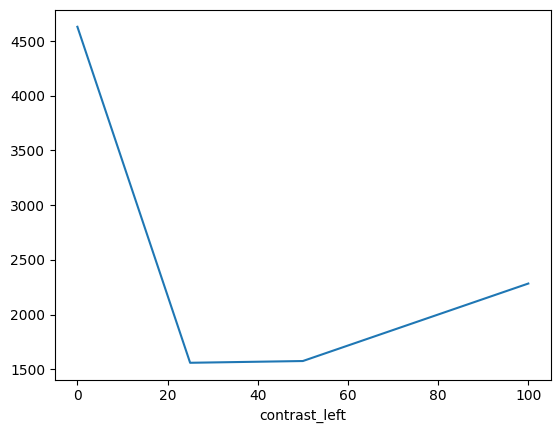

In [21]:
df.groupby('contrast_left').size().plot.line();

## Visualizing the Experimental Design using Some Useful Plotting Recipes

We'll be using the Seaborn package a lot in this course, because it makes it straightforward to describe how a plot should be made using the names of the columns in the dataset.  Let's try out a few using the following patterns:

```python
sns.countplot(df['column1']);
sns.histplot(df['column1');
sns.kdeplot(df['column1']);
sns.heatmap(df.groupby(['column1', 'column2'])['column3'].size().unstack())
```

**Exercises**: Make some plots of the data using Seaborn (`sns`)!

*Example*: How many trials were in each session?

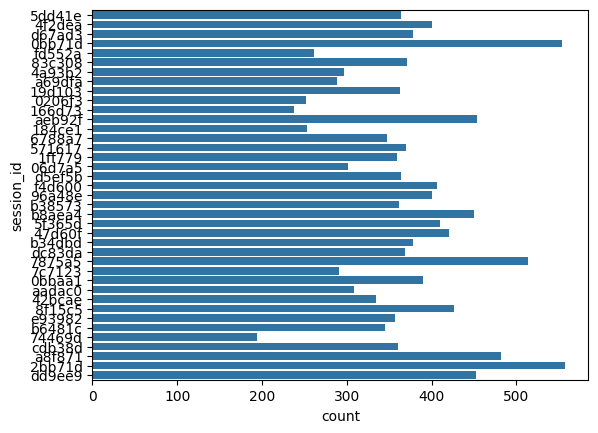

In [59]:
sns.countplot(df['session_id']);

How many trials did each mouse do?

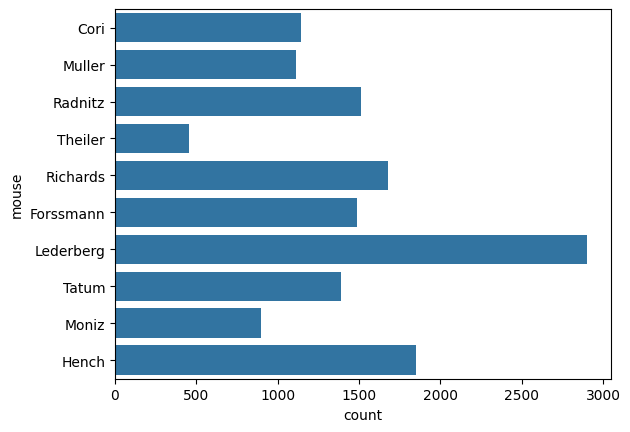

In [60]:
sns.countplot(df['mouse']);

Make a histogram of the response times in the dataset

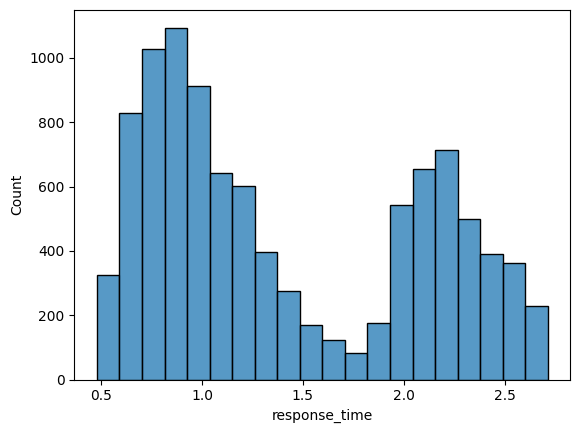

In [62]:
sns.histplot(df['response_time']);

Make a kernel density estimate (kind of a smoothed histogram) of the response times in the dataset.

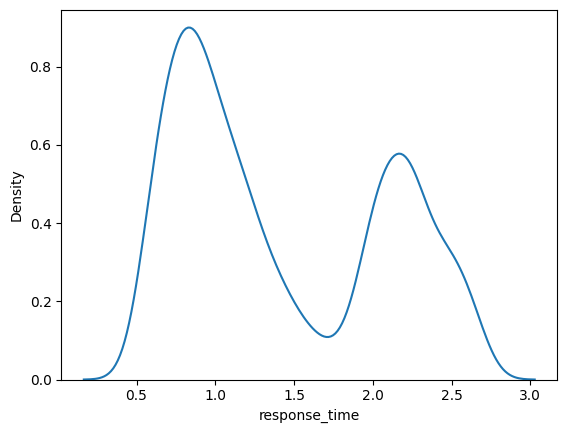

In [61]:
sns.kdeplot(df.response_time);

This one is a little more complex: Using `groupby`, `size()`, and `unstack`, make a heatmap of showing number of contrast_left and contrast_right trials

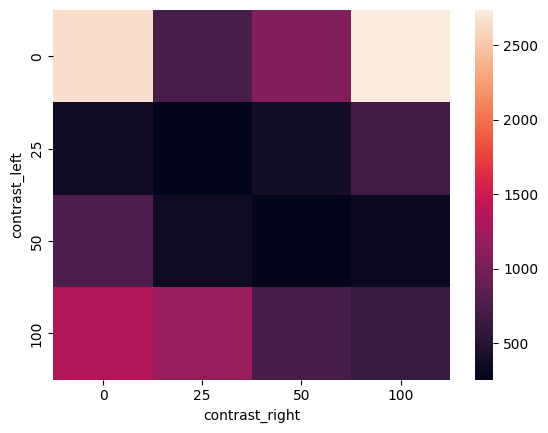

In [66]:
sns.heatmap(df.groupby(['contrast_left', 'contrast_right']).size().unstack());